In [49]:
from time import time
from scipy import sparse
from scipy import linalg
import matplotlib.pyplot as plt
import nibabel as nib
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import SimpleITK as sitk
import six
from radiomics import featureextractor 
from radiomics import imageoperations
import numpy as np
from numpy import linalg

In [50]:
# Load QSM and segmentation
seg = nib.load('F:/dbs/PD_auto_qsm_t1/PD_auto_QSM/001/seg.nii')
qsm = nib.load('F:/dbs/PD_auto_qsm_t1/PD_auto_QSM/001/QSM.nii')
voxel_size = qsm.header['pixdim'][0:3]

In [60]:
seg_sitk = sitk.GetImageFromArray(seg.get_fdata())
seg_sitk.SetSpacing(voxel_size.tolist())
qsm_sitk = sitk.GetImageFromArray(qsm.get_fdata())
qsm_sitk.SetSpacing(voxel_size.tolist())
qsm_sitk_n = imageoperations.normalizeImage(qsm_sitk)

extractor0 = featureextractor.RadiomicsFeatureExtractor()
extractor0.disableAllFeatures()
# feat_class = 'glcm'
# extractor0.enableFeatureClassByName(feat_class)
# Perform global extraction to obtain bounding box for each ROI
Phi = []
for j in range(1,int(np.max(seg.get_fdata()))+1):
    featureVector = extractor0.execute(qsm_sitk,seg_sitk,label=j)
    Phi.append(featureVector)


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [65]:
Phi[0]

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'),
             ('diagnostics_Versions_Numpy', '1.21.5'),
             ('diagnostics_Versions_SimpleITK', '2.2.1'),
             ('diagnostics_Versions_PyWavelet', '1.3.0'),
             ('diagnostics_Versions_Python', '3.7.15'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}),
             ('diagn

In [67]:
x_row = []
for j in range(int(np.max(seg.get_fdata()))):
    featureVector = Phi[j]
    for key, value in six.iteritems(featureVector):
        if feat_class in key:
            x_row.append(value)

X0 = np.array(x_row)
X = sparse.coo_matrix(X0)


In [68]:
X0

array([ 4.56541307e+01,  1.19475961e+02, -4.08465041e+00,  5.07826489e+00,
        7.25516286e-01,  7.47684517e-01,  5.15040893e-01,  1.28211484e+00,
        4.46955648e-01,  7.71386769e-01,  7.62680950e-01,  9.93039774e-01,
        9.54674170e-01, -3.22060433e-01,  8.59564049e-01,  3.83269427e-01,
        6.67568272e+00,  1.26247974e-01,  3.70785509e+00,  7.92622887e-01,
        2.53097465e-01,  1.33513654e+01,  3.05092479e+00,  1.45094529e+00,
        4.14854958e+01,  1.65517429e+02,  2.88107641e+00,  7.10377398e+00,
        9.23657846e-01,  7.70121329e-01,  6.47064667e-01,  1.38769610e+00,
        4.79759860e-01,  7.16482563e-01,  7.03196235e-01,  9.92616933e-01,
        9.47771494e-01, -3.07775367e-01,  8.73912704e-01,  4.56066232e-01,
        6.31958247e+00,  7.64762747e-02,  4.27652360e+00,  8.48320450e-01,
        1.62502075e-01,  1.26391649e+01,  3.39774293e+00,  2.00685796e+00,
        4.65421553e+01,  8.71711161e+02,  1.95025974e+01,  2.05864759e+01,
        2.15199392e+00,  

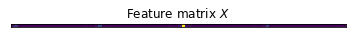

In [69]:
plt.imshow(np.expand_dims(X0,0))
plt.xticks([])
plt.yticks([])
plt.title('Feature matrix $X$');

In [70]:
X0 = X0.T

In [71]:
X0.shape

(96,)

In [72]:
linalg.matrix_rank(X0)

1

In [73]:
# UPDRS score
# Response vector u [=] n_samples x n_targets
# 1 x 4
u = np.expand_dims(np.array([0,1,24,1]).T,0)

In [74]:
# Simple 1D example
scaler = StandardScaler()
X0 = scaler.fit_transform(X0.reshape(-1,1))
X0 = X0.T

In [75]:
X0

array([[ 0.30951096,  1.11710491, -0.23461993, -0.13437973, -0.18199781,
        -0.18175529, -0.18430036, -0.17590875, -0.1850452 , -0.181496  ,
        -0.18159124, -0.17907116, -0.17949087, -0.19345806, -0.18053136,
        -0.18574191, -0.11690435, -0.18855367, -0.1493717 , -0.18126368,
        -0.18716596, -0.04387391, -0.15655837, -0.17406178,  0.26390705,
         1.62078804, -0.15841647, -0.11222113, -0.17983019, -0.18150984,
        -0.18285605, -0.17475371, -0.18468633, -0.18209664, -0.18224199,
        -0.17907579, -0.17956639, -0.19330178, -0.18037439, -0.18494553,
        -0.1208    , -0.18909816, -0.1431506 , -0.18065436, -0.18815706,
        -0.05166522, -0.15276426, -0.16798022,  0.31922575,  9.346386  ,
         0.02341916,  0.03527655, -0.16639247, -0.18111586, -0.17783488,
        -0.17119426, -0.18131174, -0.18347138, -0.18392566, -0.17915174,
        -0.17986606, -0.19526571, -0.17928142, -0.1848729 , -0.11918962,
        -0.18939118, -0.13860322, -0.1800512 , -0.1

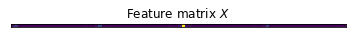

In [76]:
plt.imshow(X0)
plt.xticks([])
plt.yticks([])
plt.title('Feature matrix $X$');

In [79]:
reg = Lasso(alpha=0.1,fit_intercept=False, max_iter=10000, tol=0.1)
w_min = reg.fit(X0,u)
# reg.predict()

c:\Users\agr78\Anaconda3\envs\pdradenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [80]:
w_min.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [81]:
#Closed form solution to L2 norm of Aw = u
L = linalg.det(np.matmul(X0,X0.T))
if abs(L) > 0:
    wc =np.matmul(X0.T,linalg.inv(np.matmul(X0,X0.T)))*np.squeeze(u)

In [82]:
(w_min.coef_).shape

(4, 96)

In [83]:
X0.shape

(1, 96)

In [84]:
# Compute u_est = Aw_min
u_est = np.matmul((X0),(w_min.coef_).T)

In [85]:
u_est

array([[ 0.        ,  0.98930068, 23.98930068,  0.98930068]])

In [86]:
mse = np.sum(np.sqrt((u-u_est)**2),1)

In [87]:
mse

array([0.03209797])

In [88]:
# Compute u_est = Aw_min
u_c = np.matmul((X0),(wc))

In [89]:
u_c

array([[ 0.,  1., 24.,  1.]])